In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
adult = fetch_openml("adult", version=2, as_frame=True).frame
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


In [4]:
# Distribution

In [5]:
adult["class"].value_counts(normalize=True)

class
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64

In [6]:
# High income is structurally rare, not the default outcome.

In [7]:
# Missingness

In [8]:
adult.isna().mean().sort_values(ascending=False)

occupation        0.057512
workclass         0.057307
native-country    0.017546
age               0.000000
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
dtype: float64

In [9]:
# Univariate EDA

In [10]:
# Age

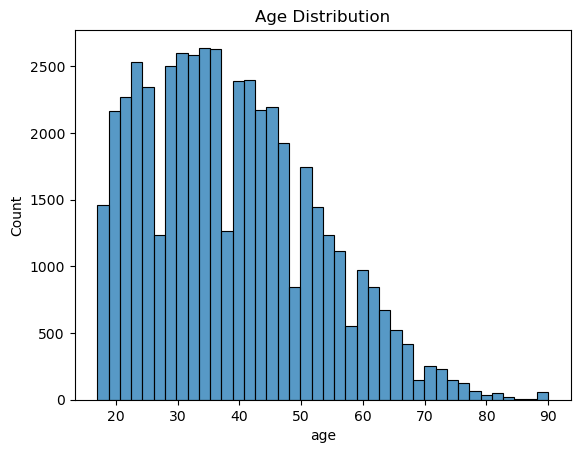

In [11]:
sns.histplot(adult["age"], bins=40)
plt.title("Age Distribution")
plt.show()

In [12]:
# Education (ordinal + categorical)

In [13]:
adult["education"].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [14]:
adult.groupby("education", observed=True)["class"].value_counts(normalize=True).unstack()

class,<=50K,>50K
education,,
10th,0.937365,0.062635
11th,0.949227,0.050773
12th,0.926941,0.073059
1st-4th,0.967611,0.032389
5th-6th,0.946955,0.053045
7th-8th,0.935079,0.064921
9th,0.945767,0.054233
Assoc-acdm,0.742036,0.257964
Assoc-voc,0.746725,0.253275


In [15]:
# Hours worked

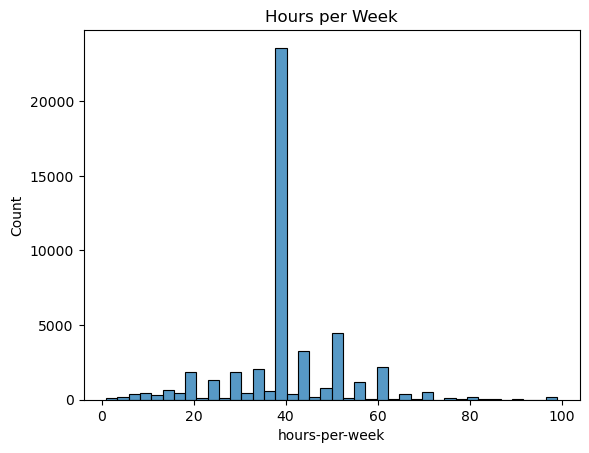

In [16]:
sns.histplot(adult["hours-per-week"], bins=40)
plt.title("Hours per Week")
plt.show()

In [17]:
adult.groupby("class", observed=True)["hours-per-week"].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
<=50K,37155.0,38.840048,12.356849,1.0,35.0,40.0,40.0,99.0
>50K,11687.0,45.452896,11.091176,1.0,40.0,40.0,50.0,99.0


In [18]:
# Bivariate EDA

In [19]:
# Education × income

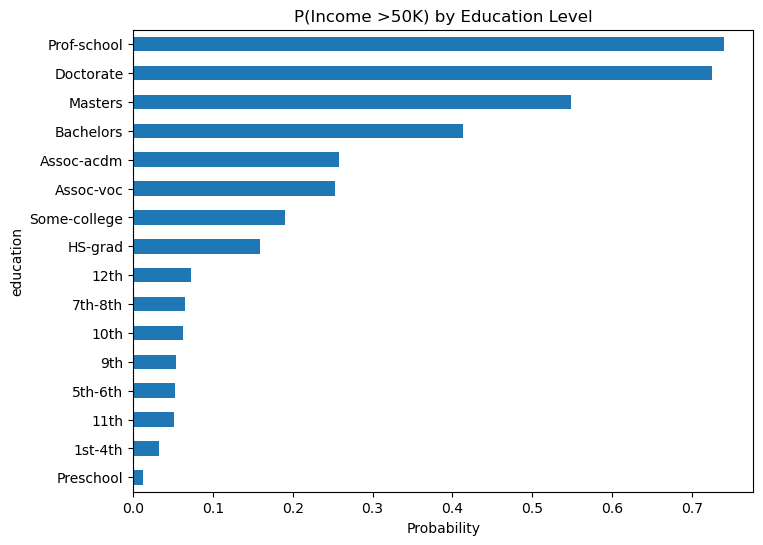

In [20]:
edu_income = (
    adult.groupby("education", observed=True)["class"]
    .value_counts(normalize=True)
    .unstack()
    .sort_values(">50K")
)

edu_income[">50K"].plot(kind="barh", figsize=(8,6))
plt.title("P(Income >50K) by Education Level")
plt.xlabel("Probability")
plt.show()

In [21]:
# Education is one of the clearest institutional gates to income.

In [22]:
# Sex × income (gender gap)

In [23]:
adult.groupby("sex", observed=True)["class"].value_counts(normalize=True).unstack()

class,<=50K,>50K
sex,,
Female,0.890749,0.109251
Male,0.696233,0.303767


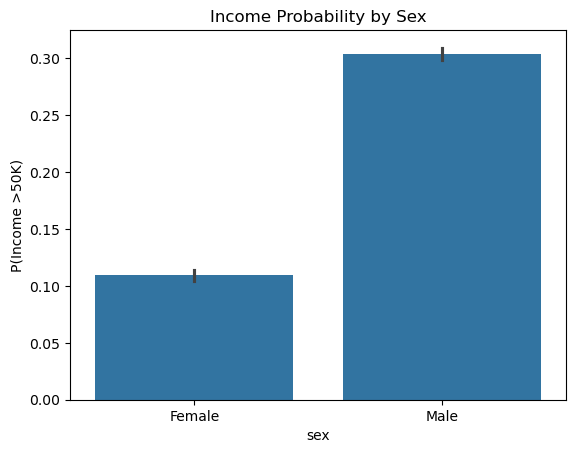

In [24]:
sns.barplot(
    data=adult,
    x="sex",
    y=(adult["class"] == ">50K").astype(int)
)
plt.ylabel("P(Income >50K)")
plt.title("Income Probability by Sex")
plt.show()

In [25]:
# Race × income

In [26]:
adult.groupby("race", observed=True)["class"].value_counts(normalize=True).unstack()

class,<=50K,>50K
race,,
Amer-Indian-Eskimo,0.882979,0.117021
Asian-Pac-Islander,0.730744,0.269256
Black,0.879189,0.120811
Other,0.876847,0.123153
White,0.746013,0.253987


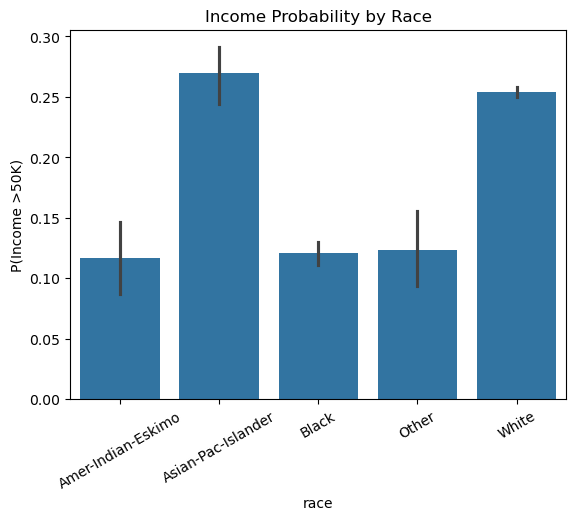

In [27]:
sns.barplot(
    data=adult,
    x="race",
    y=(adult["class"] == ">50K").astype(int)
)
plt.xticks(rotation=30)
plt.ylabel("P(Income >50K)")
plt.title("Income Probability by Race")
plt.show()

In [28]:
# Occupational stratification

In [29]:
# Occupation × income

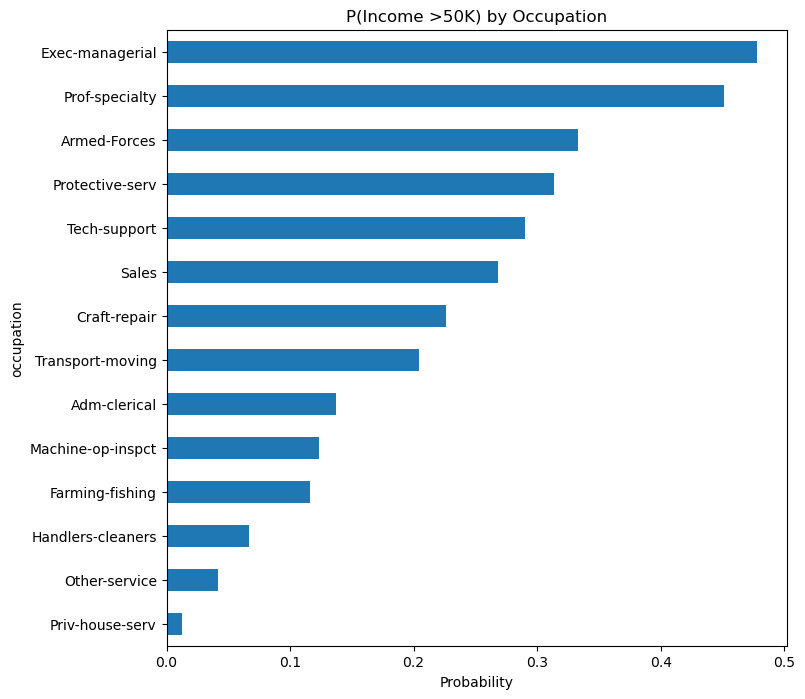

In [30]:
occ_income = (
    adult.groupby("occupation", observed=True)["class"]
    .value_counts(normalize=True)
    .unstack()
    .sort_values(">50K")
)

occ_income[">50K"].plot(kind="barh", figsize=(8,8))
plt.title("P(Income >50K) by Occupation")
plt.xlabel("Probability")
plt.show()

In [31]:
# Capital gains

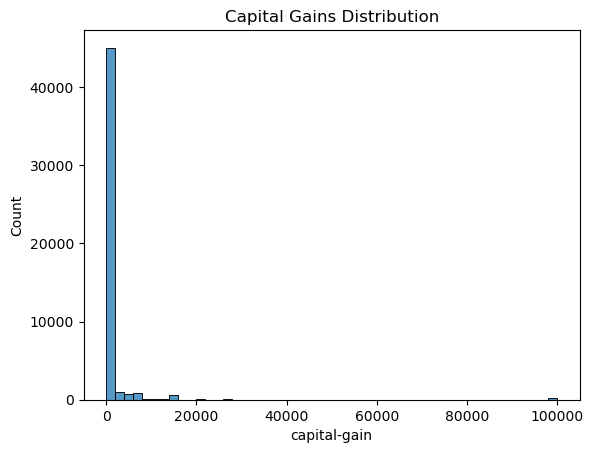

In [32]:
sns.histplot(adult["capital-gain"], bins=50)
plt.title("Capital Gains Distribution")
plt.show()

In [33]:
adult.groupby("class", observed=True)["capital-gain"].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
<=50K,37155.0,147.010308,936.753678,0.0,0.0,0.0,0.0,41310.0
>50K,11687.0,4042.239497,14756.771034,0.0,0.0,0.0,0.0,99999.0


In [34]:
# Multivariate EDA

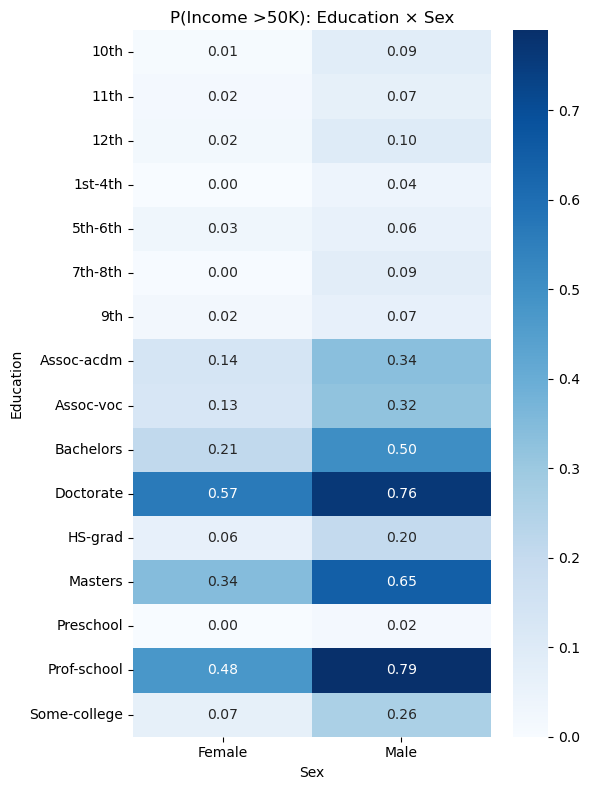

In [35]:
adult_eda = adult.copy()
adult_eda["high_income"] = (adult_eda["class"] == ">50K").astype(int)

pivot = adult_eda.pivot_table(
    index="education",
    columns="sex",
    values="high_income",
    aggfunc="mean",
    observed=True
)

plt.figure(figsize=(6, 8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="Blues")
plt.title("P(Income >50K): Education × Sex")
plt.ylabel("Education")
plt.xlabel("Sex")
plt.tight_layout()
plt.show()

In [36]:
pivot

sex,Female,Male
education,,
10th,0.008753,0.089056
11th,0.016923,0.069707
12th,0.018957,0.098655
1st-4th,0.000000,0.043011
5th-6th,0.031496,0.060209
7th-8th,0.004184,0.085196
9th,0.022727,0.067164
Assoc-acdm,0.137161,0.335729
Assoc-voc,0.126703,0.323286


In [37]:
# The gender gap narrows with education, but never disappears.

In [38]:
# A man with lower formal education still has a higher probability of high income than a woman with a higher degree.

#### High income in the Adult dataset is strongly structured by education, occupation, and capital ownership, with persistent gaps by sex and race. 

#### Working more hours increases income probability only marginally beyond a threshold. 

#### The distribution of income outcomes reflects institutional stratification more than individual effort.

#### Across all education levels, men exhibit a higher probability of earning above $50K than women. 

#### While education substantially increases income prospects for both sexes and reduces relative disparities at higher credential levels, it does not eliminate the gender gap. 

#### Even at the doctoral and professional degree levels, men retain a significant advantage, indicating that returns to education are structured by gender rather than determined by credentials alone.

In [39]:
# Control for occupation

In [40]:
# Income probability by sex × occupation

In [41]:
occ_sex = (
    adult_eda
    .dropna(subset=["occupation"])
    .groupby(["occupation", "sex"], observed=True)["high_income"]
    .mean()
    .unstack()
)

In [42]:
# Sort occupations by overall income probability

In [43]:
occ_order = (
    adult_eda
    .dropna(subset=["occupation"])
    .groupby("occupation", observed=True)["high_income"]
    .mean()
    .sort_values()
    .index
)

occ_sex = occ_sex.loc[occ_order]

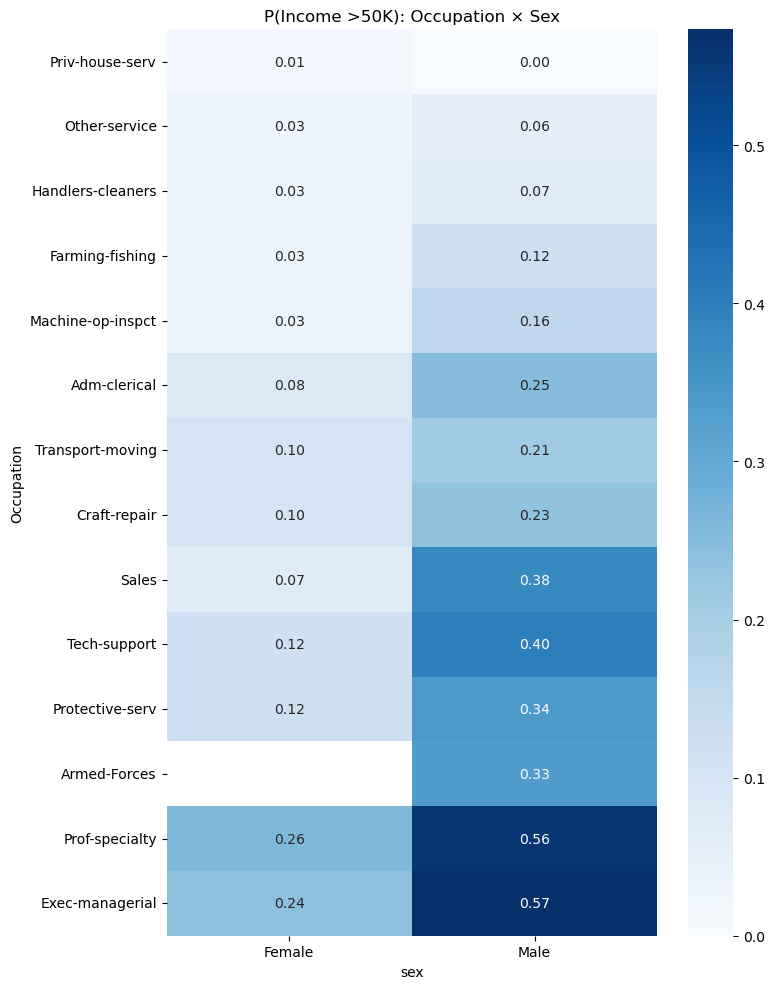

In [44]:
plt.figure(figsize=(8, 10))
sns.heatmap(occ_sex, annot=True, fmt=".2f", cmap="Blues")
plt.title("P(Income >50K): Occupation × Sex")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()

In [45]:
# Hours-per-week × Education × Sex

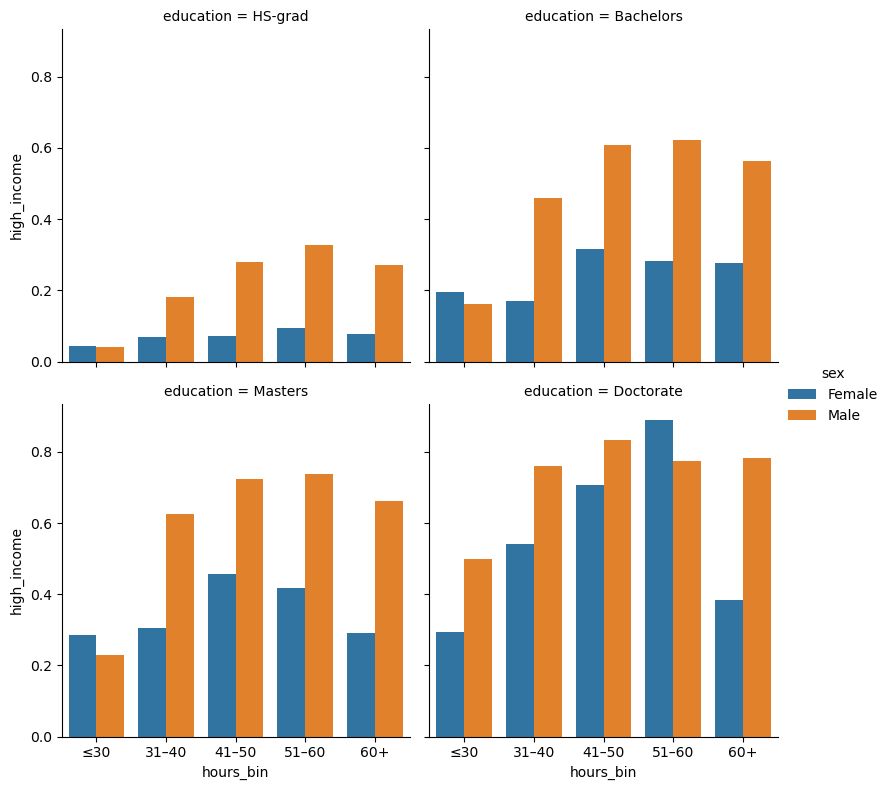

In [46]:
# Make sure high_income exists and is numeric
adult_eda["high_income"] = (adult_eda["class"] == ">50K").astype(np.int8)

adult_eda["hours_bin"] = pd.cut(
    adult_eda["hours-per-week"],
    bins=[0, 30, 40, 50, 60, np.inf],
    labels=["≤30", "31–40", "41–50", "51–60", "60+"],
    include_lowest=True,
    right=True
)

pivot_hours = (
    adult_eda
    .dropna(subset=["hours_bin", "sex", "education"])
    .groupby(["education", "hours_bin", "sex"], observed=True)["high_income"]
    .mean()
    .reset_index()
)

edu_focus = ["HS-grad", "Bachelors", "Masters", "Doctorate"]
pivot_hours = pivot_hours[pivot_hours["education"].isin(edu_focus)].copy()

pivot_hours["education"] = pd.Categorical(
    pivot_hours["education"],
    categories=edu_focus,
    ordered=True
)

g = sns.catplot(
    data=pivot_hours,
    x="hours_bin",
    y="high_income",
    hue="sex",
    col="education",
    col_order=edu_focus,
    kind="bar",
    col_wrap=2,
    height=4,
    aspect=1,
    sharey=True
)
plt.show()

In [47]:
# Education-adjusted income residuals

sex
Female   -0.120986
Male      0.060000
Name: edu_residual, dtype: float64


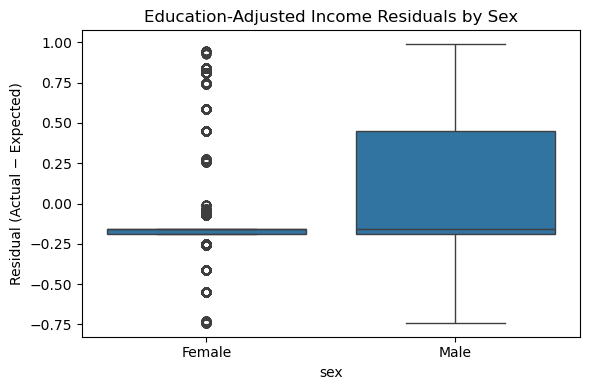

In [48]:
# Ensure numeric target
adult_eda["high_income"] = (adult_eda["class"] == ">50K").astype(np.int8)

# Drop missing education just in case (should be none, but safe)
adult_res = adult_eda.dropna(subset=["education"]).copy()

# Baseline probability by education
edu_baseline = adult_res.groupby("education", observed=True)["high_income"].mean()

# Map expected probability and compute residual
adult_res["edu_expected"] = adult_res["education"].map(edu_baseline).astype(float)
adult_res["edu_residual"] = adult_res["high_income"] - adult_res["edu_expected"]

# Summary
print(adult_res.groupby("sex", observed=True)["edu_residual"].mean().sort_values())

# Plot
plt.figure(figsize=(6,4))
sns.boxplot(data=adult_res, x="sex", y="edu_residual")
plt.title("Education-Adjusted Income Residuals by Sex")
plt.ylabel("Residual (Actual − Expected)")
plt.tight_layout()
plt.show()

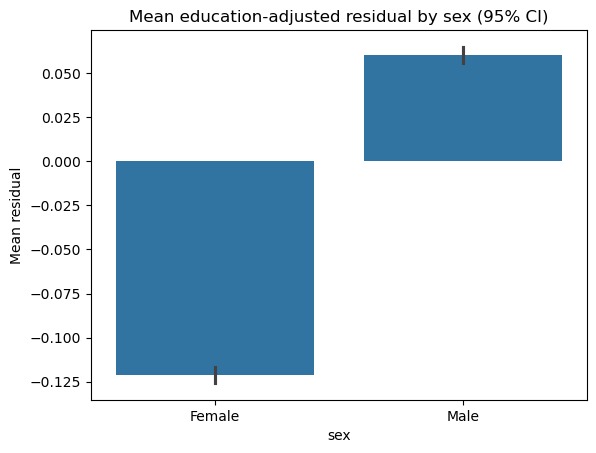

In [49]:
sns.barplot(data=adult_res, x="sex", y="edu_residual", errorbar=("ci", 95))
plt.title("Mean education-adjusted residual by sex (95% CI)")
plt.ylabel("Mean residual")
plt.show()

In [50]:
# After controlling for education, men earn more than expected, and women earn less than expected.

#### Controlling for occupation and hours worked reduces but does not eliminate the gender income gap. 

#### Even after adjusting for education, systematic residual differences remain, with men earning above and women below education-based expectations. 

#### This indicates that income outcomes are shaped not only by credentials and effort, but also by structural factors that differentially reward individuals holding the same qualifications.